# التحدي: تحليل النصوص حول علم البيانات

في هذا المثال، سنقوم بممارسة بسيطة تغطي جميع خطوات عملية علم البيانات التقليدية. لا تحتاج إلى كتابة أي كود، يمكنك فقط النقر على الخلايا أدناه لتنفيذها وملاحظة النتيجة. كجزء من التحدي، يُشجَّعك على تجربة هذا الكود مع بيانات مختلفة.

## الهدف

في هذه الدرس، ناقشنا مفاهيم مختلفة تتعلق بعلم البيانات. دعونا نحاول اكتشاف المزيد من المفاهيم ذات الصلة من خلال القيام بـ **تنقيب النصوص**. سنبدأ بنص حول علم البيانات، نستخرج الكلمات المفتاحية منه، ثم نحاول تصور النتيجة.

كنص، سأستخدم الصفحة الخاصة بعلم البيانات من ويكيبيديا:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## الخطوة 1: الحصول على البيانات

الخطوة الأولى في كل عملية علم البيانات هي الحصول على البيانات. سنستخدم مكتبة `requests` للقيام بذلك:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## الخطوة 2: تحويل البيانات

الخطوة التالية هي تحويل البيانات إلى الشكل المناسب للمعالجة. في حالتنا، قمنا بتنزيل كود المصدر الخاص بـ HTML من الصفحة، ونحتاج إلى تحويله إلى نص عادي.

هناك العديد من الطرق التي يمكن من خلالها القيام بذلك. سنستخدم أبسط كائن مدمج [HTMLParser](https://docs.python.org/3/library/html.parser.html) من Python. نحتاج إلى إنشاء فئة فرعية من `HTMLParser` وتعريف الكود الذي سيجمع كل النصوص داخل علامات HTML، باستثناء علامات `<script>` و `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## الخطوة 3: الحصول على رؤى

الخطوة الأهم هي تحويل بياناتنا إلى شكل يمكننا من خلاله استخلاص رؤى. في حالتنا، نريد استخراج الكلمات المفتاحية من النص، ومعرفة أي الكلمات المفتاحية أكثر أهمية.

سنستخدم مكتبة بايثون تسمى [RAKE](https://github.com/aneesha/RAKE) لاستخراج الكلمات المفتاحية. أولاً، دعونا نقوم بتثبيت هذه المكتبة إذا لم تكن موجودة:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


تتوفر الوظيفة الرئيسية من كائن `Rake`، والذي يمكننا تخصيصه باستخدام بعض المعلمات. في حالتنا، سنحدد الحد الأدنى لطول الكلمة الرئيسية ليكون 5 أحرف، والحد الأدنى لتكرار الكلمة الرئيسية في المستند ليكون 3، والحد الأقصى لعدد الكلمات في الكلمة الرئيسية ليكون 2. لا تتردد في تجربة قيم أخرى وملاحظة النتيجة.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

حصلنا على قائمة من المصطلحات مع درجة الأهمية المرتبطة بها. كما ترى، فإن التخصصات الأكثر أهمية، مثل تعلم الآلة والبيانات الضخمة، موجودة في القائمة في المراكز العليا.

## الخطوة 4: تصور النتيجة

يمكن للناس تفسير البيانات بشكل أفضل عندما تكون في شكل بصري. لذلك، غالبًا ما يكون من المنطقي تصور البيانات لاستخلاص بعض الأفكار. يمكننا استخدام مكتبة `matplotlib` في بايثون لرسم توزيع بسيط للكلمات المفتاحية مع مدى أهميتها:


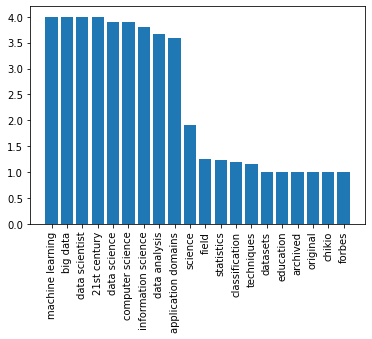

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

هناك، مع ذلك، طريقة أفضل لتصور تكرار الكلمات - باستخدام **سحابة الكلمات**. سنحتاج إلى تثبيت مكتبة أخرى لرسم سحابة الكلمات من قائمة الكلمات الرئيسية الخاصة بنا.


In [71]:
!{sys.executable} -m pip install wordcloud

`كائن WordCloud مسؤول عن استلام النص الأصلي أو قائمة الكلمات المحسوبة مسبقًا مع تردداتها، ويعيد صورة يمكن عرضها باستخدام matplotlib:`


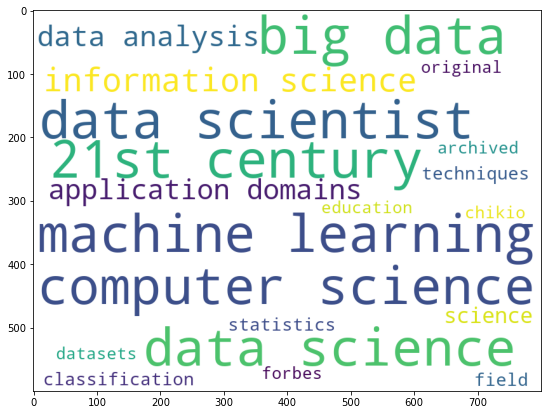

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

يمكننا أيضًا تمرير النص الأصلي إلى `WordCloud` - دعنا نرى إذا كنا قادرين على الحصول على نتيجة مشابهة:


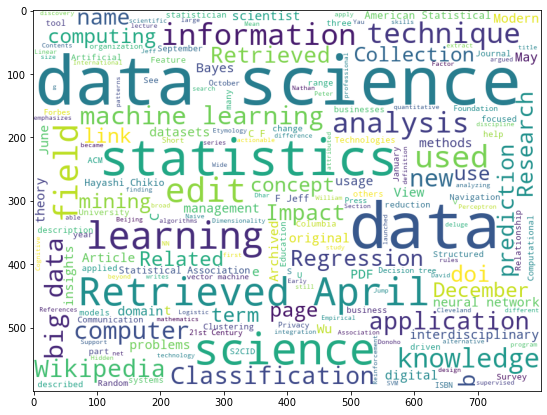

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

يمكنك أن ترى أن سحابة الكلمات أصبحت الآن أكثر جاذبية، لكنها تحتوي أيضًا على الكثير من الضوضاء (مثل كلمات غير ذات صلة مثل `Retrieved on`). بالإضافة إلى ذلك، نحصل على عدد أقل من الكلمات المفتاحية التي تتكون من كلمتين، مثل *عالم بيانات* أو *علوم الحاسوب*. السبب في ذلك هو أن خوارزمية RAKE تقوم بعمل أفضل بكثير في اختيار الكلمات المفتاحية الجيدة من النص. يوضح هذا المثال أهمية معالجة البيانات وتنظيفها، لأن الصورة الواضحة في النهاية ستسمح لنا باتخاذ قرارات أفضل.

في هذا التمرين، قمنا بعملية بسيطة لاستخراج بعض المعاني من نصوص ويكيبيديا، على شكل كلمات مفتاحية وسحابة كلمات. هذا المثال بسيط جدًا، لكنه يوضح بشكل جيد جميع الخطوات النموذجية التي يقوم بها عالم البيانات عند العمل مع البيانات، بدءًا من الحصول على البيانات وصولاً إلى التصور.

في دورتنا، سنناقش جميع هذه الخطوات بالتفصيل.



---

**إخلاء المسؤولية**:  
تم ترجمة هذا المستند باستخدام خدمة الترجمة بالذكاء الاصطناعي [Co-op Translator](https://github.com/Azure/co-op-translator). بينما نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو معلومات غير دقيقة. يجب اعتبار المستند الأصلي بلغته الأصلية المصدر الموثوق. للحصول على معلومات حاسمة، يُوصى بالاستعانة بترجمة بشرية احترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة تنشأ عن استخدام هذه الترجمة.
